# CanESM5 GMD paper Figure 7
## AGCM surface temperature, precipitation and pressure time average anomalies from observations over 1981-2010


### history
- NCS, setup basic example, 2019-03-28

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import xarray as xr
import numpy as np
import os
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy 
from datetime import datetime
import cmocean
import pandas as pd
from cdo import Cdo
import modules.basic_stats as bst
import modules.plotting_module as pltm
import sqlite3
import pickle

cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#constants are set in the master notebook
%store -r start 
%store -r end
%store -r seconds_per_day
%store -r Pa_per_hPa
%store -r title_fontsize

startdate = datetime.strptime(start,'%Y-%m-%d')
enddate   = datetime.strptime(end,'%Y-%m-%d')

In [3]:
runCDO = False

if runCDO:
    #tas
    CanESM5_tas = 'tas_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Amon/tas/gn/v20190306/', CanESM5_tas)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM5_tas
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    ERAInt_tas = 'tas_Amon_ERA-Int.nc'
    ifile = os.path.join('input_data/obs/ERA-Int/', ERAInt_tas)
    ofile = 'input_data/processed_data/remap-woa09_' + ERAInt_tas
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    ERA5_tas = 'era5_tas_monthlymean_1979-2019.nc'
    ifile = os.path.join('input_data/obs/NEIL/era5/', ERA5_tas)
    ofile = 'input_data/processed_data/remap-woa09_' + ERA5_tas
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    CanESM2_tas = 'tas_Amon_CanESM2_historical_d1r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_combined_ensemble/tas/', CanESM2_tas)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM2_tas
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    #pr
    CanESM5_pr = 'pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Amon/pr/gn/v20190306/', CanESM5_pr)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM5_pr
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    GPCP_pr = 'precip.mon.mean.nc'
    ifile = os.path.join('input_data/obs/GPCP/', GPCP_pr)
    intfile = 'processed_data/selvar-precip_' + GPCP_pr
    ofile = 'input_data/processed_data/remap-woa09_' + GPCP_pr
    cdo.selvar('precip',input=ifile, output=intfile)
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=intfile, output=ofile)
 
    CanESM2_pr = 'pr_Amon_CanESM2_historical_d1r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_combined_ensemble/pr/', CanESM2_pr)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM2_pr
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
      
    #psl
    CanESM5_psl = 'psl_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Amon/psl/gn/v20190306/', CanESM5_psl)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM5_psl
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    ERAInt_psl = 'psl_Amon_ERA-Int.nc'
    ifile = os.path.join('input_data/obs/ERA-Int/', ERAInt_psl)
    ofile = 'input_data/processed_data/remap-woa09_' + ERAInt_psl
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)

    ERA5_psl = 'era5_psl_monthlymean_1979-2019.nc'
    ifile = os.path.join('input_data/obs/NEIL/era5/', ERA5_psl)
    ofile = 'input_data/processed_data/remap-woa09_' + ERA5_psl
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)

    CanESM2_psl = 'psl_Amon_CanESM2_historical_d1r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_combined_ensemble/psl/', CanESM2_psl)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM2_psl
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)

In [4]:
tas = xr.open_dataset('input_data/processed_data/remap-woa09_tas_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['tas'].sel(time=slice(start, end)) #units K
tas_mean_i = pltm.get_weighted_globalmean(tas, 'noleap', start, end)
tas_mean = pltm.addCyclicPoint(tas_mean_i, 'lon')

pr  = (xr.open_dataset('input_data/processed_data/remap-woa09_pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['pr']*seconds_per_day).sel(time=slice(start, end)) #convert units kg m-2 s-1 == mm/s ->  mm/day 
pr_mean_i = pltm.get_weighted_globalmean(pr, 'noleap', start, end)
pr_mean = pltm.addCyclicPoint(pr_mean_i, 'lon')

psl = (xr.open_dataset('input_data/processed_data/remap-woa09_psl_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['psl']/Pa_per_hPa).sel(time=slice(start, end)) #convert Pa to hPa
psl_mean_i = pltm.get_weighted_globalmean(psl, 'noleap', start, end)
psl_mean = pltm.addCyclicPoint(psl_mean_i, 'lon')

tas_CanESM2 = xr.open_dataset('input_data/processed_data/remap-woa09_tas_Amon_CanESM2_historical_d1r1i1p1_195001-202012.nc')['tas'].sel(time=slice(start, end)) #units K
tas_mean_CanESM2_i = pltm.get_weighted_globalmean(tas_CanESM2, 'noleap', start, end)
tas_mean_CanESM2 = pltm.addCyclicPoint(tas_mean_CanESM2_i, 'lon')

pr_CanESM2 = (xr.open_dataset('input_data/processed_data/remap-woa09_pr_Amon_CanESM2_historical_d1r1i1p1_195001-202012.nc')['pr']*seconds_per_day).sel(time=slice(start, end)) #convert units kg m-2 s-1 == mm/s ->  mm/day
pr_mean_CanESM2_i = pltm.get_weighted_globalmean(pr_CanESM2, 'noleap', start, end)
pr_mean_CanESM2 = pltm.addCyclicPoint(pr_mean_CanESM2_i, 'lon')

psl_CanESM2 = (xr.open_dataset('input_data/processed_data/remap-woa09_psl_Amon_CanESM2_historical_d1r1i1p1_195001-202012.nc')['psl']/Pa_per_hPa).sel(time=slice(start, end)) #convert Pa to hPa
psl_mean_CanESM2_i = pltm.get_weighted_globalmean(psl_CanESM2, 'noleap', start, end)
psl_mean_CanESM2 = pltm.addCyclicPoint(psl_mean_CanESM2_i, 'lon')

tas_obs = xr.open_dataset('input_data/processed_data/remap-woa09_era5_tas_monthlymean_1979-2019.nc')['t2m'].sel(time=slice(start, end)) #units K
tas_obs_mean_i = pltm.get_weighted_globalmean(tas_obs, 'standard', start, end)
tas_obs_mean = pltm.addCyclicPoint(tas_obs_mean_i, 'lon')

pr_obs  = xr.open_dataset('input_data/processed_data/remap-woa09_precip.mon.mean.nc')['precip'].sel(time=slice(start, end)) #units mm/day
pr_obs_mean_i  = pltm.get_weighted_globalmean(pr_obs, 'standard', start, end)
pr_obs_mean = pltm.addCyclicPoint(pr_obs_mean_i, 'lon')

psl_obs  = (xr.open_dataset('input_data/processed_data/remap-woa09_era5_psl_monthlymean_1979-2019.nc')['msl']/Pa_per_hPa).sel(time=slice(start, end)) #convert Pa to hPa
psl_obs_mean_i  = pltm.get_weighted_globalmean(psl_obs, 'standard', start, end)
psl_obs_mean = pltm.addCyclicPoint(psl_obs_mean_i, 'lon')

In [5]:
tas_obsanomaly = tas_mean - tas_obs_mean
#pr_obsanomaly  = abs(pr_mean - pr_obs_mean)*100/(pr_mean/2 + pr_obs_mean/2) #percent difference
pr_obsanomaly  = (pr_mean - pr_obs_mean)#*100/abs(pr_obs_mean) #percent change from obs to model
psl_obsanomaly = psl_mean - psl_obs_mean

In [6]:
##### statistics - for global time means
xyzt = 'TTFF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections, )
weight  = xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area']
calc_skill_score=True

#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names = ['CanESM5','CanESM5','CanESM5','CanESM2','CanESM2','CanESM2']
model_datasets = [tas_mean_i, pr_mean_i, psl_mean_i, tas_mean_CanESM2_i, pr_mean_CanESM2_i, psl_mean_CanESM2_i]
model_fulldatasets = [tas, pr, psl, tas_CanESM2, pr_CanESM2, psl_CanESM2]

obs_names = ['ERA5','GPCP','ERA5','ERA5','GPCP','ERA5']
obs_datasets = [tas_obs_mean_i, pr_obs_mean_i, psl_obs_mean_i, tas_obs_mean_i, pr_obs_mean_i, psl_obs_mean_i]
obs_fulldatasets =  [tas_obs, pr_obs, psl_obs, tas_obs, pr_obs, psl_obs,]

stats_names = ['tas_global_timemean','pr_global_timemean','psl_global_timemean','tas_global_timemean_CanESM2','pr_global_timemean_CanESM2','psl_global_timemean_CanESM2']
varslist = ['tas','pr','psl','tas','pr','psl']


bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

tas CanESM5 ERA5


/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:330: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset.indexes['time'].to_datetimeindex() #set all datetime types to datetime64 for S_rmse calc


'DatetimeIndex' object has no attribute 'to_datetimeindex'
{'bias': 0.29355997385698185, 'RMSE': 2.0744441209132605, 'CRMSE': 2.0535678592490383, 'corrcoeff': 0.9911021101302668, 'model_std': 14.82851779345828, 'obs_std': 14.129542805872292, 'S_bias': 0.6523622529878338, 'S_rmse': 0.5811716247207593, 'S_dist': 0.9932336500394924}
pr CanESM5 GPCP


/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:330: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset.indexes['time'].to_datetimeindex() #set all datetime types to datetime64 for S_rmse calc


'DatetimeIndex' object has no attribute 'to_datetimeindex'
{'bias': 0.17704724781701217, 'RMSE': 1.2595193880949207, 'CRMSE': 1.2470137774008048, 'corrcoeff': 0.8416066859175142, 'model_std': 2.306424047536263, 'obs_std': 1.8834125919086933, 'S_bias': 0.6699065611192773, 'S_rmse': 0.295978669615926, 'S_dist': 0.884013487342016}
psl CanESM5 ERA5
'DatetimeIndex' object has no attribute 'to_datetimeindex'
{'bias': -0.07564047538054099, 'RMSE': 1.9644003933282468, 'CRMSE': 1.962943561030825, 'corrcoeff': 0.97301317787684, 'model_std': 8.456164181813053, 'obs_std': 8.01407352606723, 'S_bias': 0.712375330227485, 'S_rmse': 0.3354506203627494, 'S_dist': 0.9836676415699454}
tas CanESM2 ERA5
'DatetimeIndex' object has no attribute 'to_datetimeindex'
{'bias': 0.2957206484733916, 'RMSE': 2.1591732208052608, 'CRMSE': 2.138826382741021, 'corrcoeff': 0.9905590406565491, 'model_std': 14.90318082615356, 'obs_std': 14.129542805872292, 'S_bias': 0.6547578645324919, 'S_rmse': 0.5646392242533501, 'S_dist':

/fs/site2/dev/eccc/crd/ccrn/users/scrd104/cmip6_gmd_figures/modules/basic_stats.py:330: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = dataset.indexes['time'].to_datetimeindex() #set all datetime types to datetime64 for S_rmse calc


'DatetimeIndex' object has no attribute 'to_datetimeindex'
{'bias': 0.055268209673155336, 'RMSE': 1.2524247423091532, 'CRMSE': 1.251204683554083, 'corrcoeff': 0.8188916102845702, 'model_std': 2.1723843220509544, 'obs_std': 1.8834125919086933, 'S_bias': 0.6631590101754272, 'S_rmse': 0.3074452865602165, 'S_dist': 0.8911649311631806}
psl CanESM2 ERA5
'DatetimeIndex' object has no attribute 'to_datetimeindex'
{'bias': -0.08977042762596582, 'RMSE': 2.2641494205668558, 'CRMSE': 2.262369083279092, 'corrcoeff': 0.9662876196278898, 'model_std': 8.67176159305816, 'obs_std': 8.01407352606723, 'S_bias': 0.6922086354244565, 'S_rmse': 0.348143188849847, 'S_dist': 0.9770530333404359}


In [7]:
#calc seasonal zms and pickle for future use
calc_seasonal = True

if calc_seasonal:
    print('tas',datetime.now())
    tas_DJF = pltm.get_seasonal(tas,'noleap','DJF')
    tas_JJA = pltm.get_seasonal(tas,'noleap','JJA')

    print('pr',datetime.now())
    pr_DJF = pltm.get_seasonal(pr,'noleap','DJF')
    pr_JJA = pltm.get_seasonal(pr,'noleap','JJA')

    print('psl', datetime.now())
    psl_DJF = pltm.get_seasonal(psl,'noleap','DJF')
    psl_JJA = pltm.get_seasonal(psl,'noleap','JJA')
  
    print('tas_obs',datetime.now())
    tas_obs_DJF = pltm.get_seasonal(tas_obs,'standard','DJF')
    tas_obs_JJA = pltm.get_seasonal(tas_obs,'standard','JJA')

    print('pr_obs',datetime.now())
    pr_obs_DJF = pltm.get_seasonal(pr_obs,'standard','DJF')
    pr_obs_JJA = pltm.get_seasonal(pr_obs,'standard','JJA')

    print('psl_obs',datetime.now())
    psl_obs_DJF = pltm.get_seasonal(psl_obs,'standard','DJF')
    psl_obs_JJA = pltm.get_seasonal(psl_obs,'standard','JJA')

    seasonal_zms = {
        'tas_DJF':pltm.addCyclicPoint(tas_DJF, 'lon'),
        'tas_JJA':pltm.addCyclicPoint(tas_JJA, 'lon'),
        'pr_DJF':pltm.addCyclicPoint(pr_DJF, 'lon'),
        'pr_JJA':pltm.addCyclicPoint(pr_JJA, 'lon'),
        'psl_DJF':pltm.addCyclicPoint(psl_DJF, 'lon'),
        'psl_JJA':pltm.addCyclicPoint(psl_JJA, 'lon'),
        'tas_obs_DJF':pltm.addCyclicPoint(tas_obs_DJF, 'lon'),
        'tas_obs_JJA':pltm.addCyclicPoint(tas_obs_JJA, 'lon'),
        'pr_obs_DJF':pltm.addCyclicPoint(pr_obs_DJF, 'lon'),
        'pr_obs_JJA':pltm.addCyclicPoint(pr_obs_JJA, 'lon'),
        'psl_obs_DJF':pltm.addCyclicPoint(psl_obs_DJF, 'lon'),
        'psl_obs_JJA':pltm.addCyclicPoint(psl_obs_JJA, 'lon'),    
    }   

    with open('input_data/processed_data/tas_pr_psl_seasonal.pickle', 'wb') as f:
            pickle.dump(seasonal_zms, f) 
else:
    with open('input_data/processed_data/tas_pr_psl_seasonal.pickle', 'rb') as f:
        seasonal_zms = pickle.load(f)    

tas 2019-10-07 21:07:38.844214
pr 2019-10-07 21:07:39.934201
psl 2019-10-07 21:07:40.753793
tas_obs 2019-10-07 21:07:41.408888
pr_obs 2019-10-07 21:07:42.597220
psl_obs 2019-10-07 21:07:43.673309


/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/mi

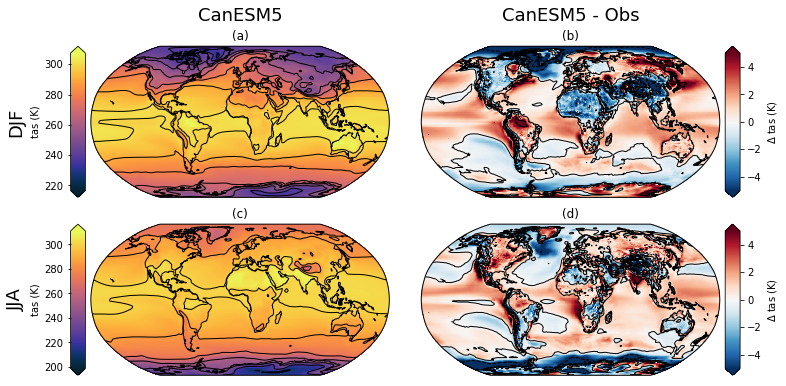

In [13]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'tas (K)')
ax1.contour(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax3.contour(seasonal_zms['tas_DJF'].lon, seasonal_zms['tas_DJF'].lat, seasonal_zms['tas_DJF'] - 
                          seasonal_zms['tas_obs_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'], 
                        cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'tas (K)')
ax2.contour(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'],
            10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ tas (K)')
ax4.contour(seasonal_zms['tas_JJA'].lon, seasonal_zms['tas_JJA'].lat, seasonal_zms['tas_JJA'] - 
                          seasonal_zms['tas_obs_JJA'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
    
fig.savefig('plots/fig-05_tas-seas-climanom-abs.png', bbox_inches='tight')
fig.savefig('plots/fig-05_tas-seas-climanom-abs.pdf', bbox_inches='tight')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/mi

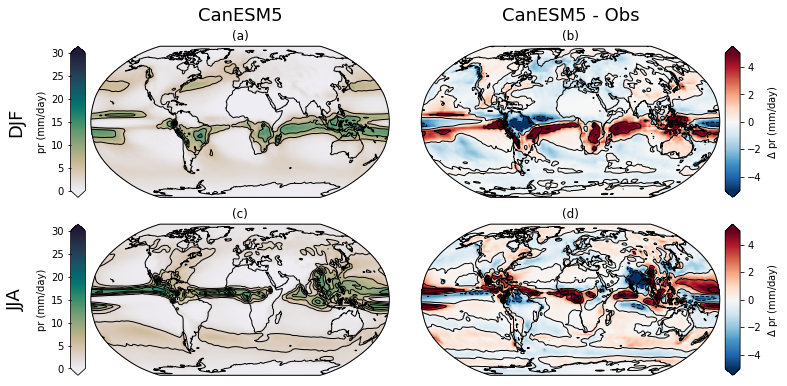

In [14]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(seasonal_zms['pr_DJF'].lon, seasonal_zms['pr_DJF'].lat, seasonal_zms['pr_DJF'], vmin=0, vmax=30, 
                        cmap=cmocean.cm.rain, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'pr (mm/day)')
ax1.contour(seasonal_zms['pr_DJF'].lon, seasonal_zms['pr_DJF'].lat, seasonal_zms['pr_DJF'], 7, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.25, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(seasonal_zms['pr_DJF'].lon, seasonal_zms['pr_DJF'].lat, seasonal_zms['pr_DJF'] - 
                          seasonal_zms['pr_obs_DJF'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ pr (mm/day)')
ax3.contour(seasonal_zms['pr_DJF'].lon, seasonal_zms['pr_DJF'].lat, seasonal_zms['pr_DJF'] - 
                          seasonal_zms['pr_obs_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(seasonal_zms['pr_JJA'].lon, seasonal_zms['pr_JJA'].lat, seasonal_zms['pr_JJA'], vmin=0, vmax=30,
                        cmap=cmocean.cm.rain, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'pr (mm/day)')
ax2.contour(seasonal_zms['pr_JJA'].lon, seasonal_zms['pr_JJA'].lat, seasonal_zms['pr_JJA'], 7, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.25, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(seasonal_zms['pr_JJA'].lon, seasonal_zms['pr_JJA'].lat, seasonal_zms['pr_JJA'] - 
                          seasonal_zms['pr_obs_JJA'], cmap=cmap2,vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ pr (mm/day)')
ax4.contour(seasonal_zms['pr_JJA'].lon, seasonal_zms['pr_JJA'].lat, seasonal_zms['pr_JJA'] - 
                          seasonal_zms['pr_obs_JJA'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
fig.savefig('plots/fig-06_pr-seas-climanom-abs.png', bbox_inches='tight')
fig.savefig('plots/fig-06_pr-seas-climanom-abs.pdf', bbox_inches='tight')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ords/crd/ccrn/scrd104/mi

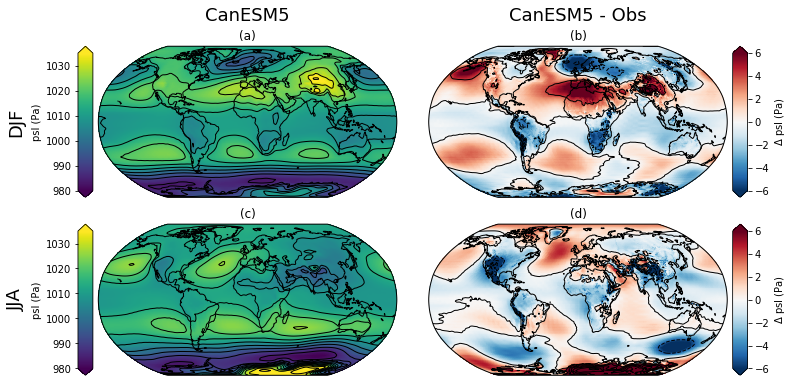

In [16]:
fig = plt.figure(figsize=(12,12))
cmap2=plt.cm.RdBu_r

ax1 = plt.subplot(3,2,1,projection=ccrs.Robinson())
cb_tas = ax1.pcolormesh(seasonal_zms['psl_DJF'].lon, seasonal_zms['psl_DJF'].lat, seasonal_zms['psl_DJF'], 
                        cmap=plt.cm.viridis, transform=ccrs.PlateCarree(), vmin=980, vmax=1035, rasterized=True)
pltm.add_cbar('left', fig, ax1, cb_tas, extend='both', label =r'psl (Pa)')
ax1.contour(seasonal_zms['psl_DJF'].lon, seasonal_zms['psl_DJF'].lat, seasonal_zms['psl_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax1.set_title('(a)')
ax1.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize,
         transform=ax1.transAxes)
ax1.text(-0.275, 0.5, 'DJF', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax1.transAxes)

ax3 = plt.subplot(3,2,2,projection=ccrs.Robinson())
cb_tasan = ax3.pcolormesh(seasonal_zms['psl_DJF'].lon, seasonal_zms['psl_DJF'].lat, seasonal_zms['psl_DJF'] - 
                          seasonal_zms['psl_obs_DJF'], cmap=cmap2,vmin=-6, vmax=6, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax3, cb_tasan, extend='both', label =r'$\Delta$ psl (Pa)')
ax3.contour(seasonal_zms['psl_DJF'].lon, seasonal_zms['psl_DJF'].lat, seasonal_zms['psl_DJF'] - 
                          seasonal_zms['psl_obs_DJF'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax3.set_title('(b)')
ax3.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, 
         transform=ax3.transAxes)

ax2 = plt.subplot(3,2,3,projection=ccrs.Robinson())
cb_tas = ax2.pcolormesh(seasonal_zms['psl_JJA'].lon, seasonal_zms['psl_JJA'].lat, seasonal_zms['psl_JJA'], 
                        cmap=plt.cm.viridis, transform=ccrs.PlateCarree(), vmin=980, vmax=1035, rasterized=True)
pltm.add_cbar('left', fig, ax2, cb_tas, extend='both', label =r'psl (Pa)')
ax2.contour(seasonal_zms['psl_JJA'].lon, seasonal_zms['psl_JJA'].lat, seasonal_zms['psl_JJA'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax2.set_title('(c)')
ax2.text(-0.275, 0.5, 'JJA', horizontalalignment='center', verticalalignment='center',rotation='vertical', 
         fontsize=title_fontsize, transform=ax2.transAxes)

ax4 = plt.subplot(3,2,4,projection=ccrs.Robinson())
cb_tasan = ax4.pcolormesh(seasonal_zms['psl_JJA'].lon, seasonal_zms['psl_JJA'].lat, seasonal_zms['psl_JJA'] - 
                          seasonal_zms['psl_obs_JJA'], cmap=cmap2,vmin=-6, vmax=6, transform=ccrs.PlateCarree(), rasterized=True) 
pltm.add_cbar('right', fig, ax4, cb_tasan, extend='both', label =r'$\Delta$ psl (Pa)')
ax4.contour(seasonal_zms['psl_JJA'].lon, seasonal_zms['psl_JJA'].lat, seasonal_zms['psl_JJA'] - 
                          seasonal_zms['psl_obs_JJA'], 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
ax4.set_title('(d)')

fig.subplots_adjust(wspace=0.1, hspace=-0.4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
    
fig.savefig('plots/fig-07_psl-seas-climanom-abs.png', bbox_inches='tight')
fig.savefig('plots/fig-07_psl-seas-climanom-abs.pdf', bbox_inches='tight')